<a href="https://colab.research.google.com/github/Leonel-Ariel-Ruppel/READ-ME/blob/main/Maestr%C3%ADa_teor%C3%ADa_00_y_01_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

001 Introducción

In [ ]:
from google.colab import drive
import os
import requests

In [ ]:
#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
  os.mkdir(contentFolder) #Si no existe la carpeta, la crea para poder guardar archivos.

In [ ]:
#Ubicación del archivo Orders #poner el archivo en la carpeta creada
urlOrdersDetails = "https://drive.google.com/uc?id=1ycMBmIHJnRBHlluaihby6ckIEuS8Tqzu"
r = requests.get(urlOrdersDetails)
open("{}/ordersDetails.txt".format(contentFolder), "wb").write(r.content)

#Ubicación del archivo ordersDetails
urlOrders = "https://drive.google.com/uc?id=1egfg_5k_K1Vypbl_UbWNIqP-_hQNowCv"
r = requests.get(urlOrders)
open("{}/orders.txt".format(contentFolder), "wb").write(r.content)

19772972

002 Importar librerías: pandas, numpy, seaborn y matplotlib

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

import matplotlib
import matplotlib.pyplot as plt
from google.colab import drive
import os
import requests

In [ ]:
#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Ubicación del archivo Orders
urlOrdersTitanicTrain = "https://drive.google.com/uc?id=1hZAS7bZndWwIhpi7231sdQPfIfMhKyjb" #asigna la URL a la variable
r = requests.get(urlOrdersTitanicTrain) #me traigo el contenido de la url a la variable r.
open("{}/titanic_train.txt".format(contentFolder), "wb").write(r.content) #abre el archivo txt donde se deposita el contenido de r.

61194

In [ ]:
#Para levantar un archivo de Texto se utiliza la sentencia read_csv (ya sea un .txt o un .csv)
data = pd.read_csv("{}/titanic_train.txt".format(contentFolder))

Diccionario de los campos de la base

Survived -> Survival - target (0 = No, 1 = Si)

Pclass -> Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)

Age -> Age in years

Sex -> Sex (male, female)

SibSp -> of siblings / spouses aboard the Titanic

Parch -> of parents / children aboard the Titanic

Ticket -> ticket number

Fare -> Passenger Fare (Tarifa)

Cabin -> cabin Number

Embarked -> Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
#fo = open("./titanic.csv", "r")
#print ("Name of the file: ", fo.name)
#line = fo.readline()

In [ ]:
#Una primera aproximación para entender nuestra base (por lo menos los valores numéricos) se usa describe()
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Para conocer los tipos de datos que tenemos en dataframe usamos dtypes
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#otro metodo para poder validar datos es el .info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Para traer los primeros registros de la base uso .head(registros), donde registros es el valor de registros que
#quiero mostrar (si no agrego ningún dato, muestra los primeros 5 registros.
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Puedo mostrar los últimos registros usando .tail(registro). Con la misma lógica que head
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Se puede setear un campo como index
data = data.set_index("PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Q')

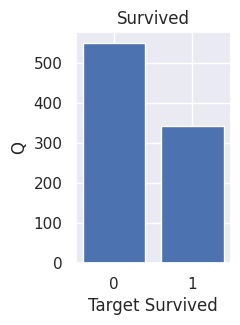

In [ ]:
aux_1 = data["Survived"].value_counts()
fig, ax = plt.subplots(figsize=(2, 3))
ax.bar(aux_1.index, aux_1)
ax.set_title('Survived')
ax.set_xlabel('Target Survived')
ax.set_ylabel('Q')

<Axes: xlabel='Sex', ylabel='Age'>

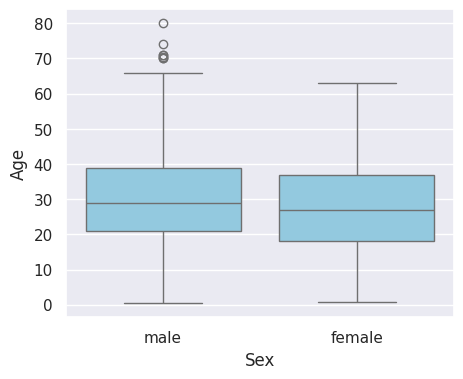

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data = data, x="Sex", y="Age", color='skyblue')

<Axes: xlabel='Pclass', ylabel='Age'>

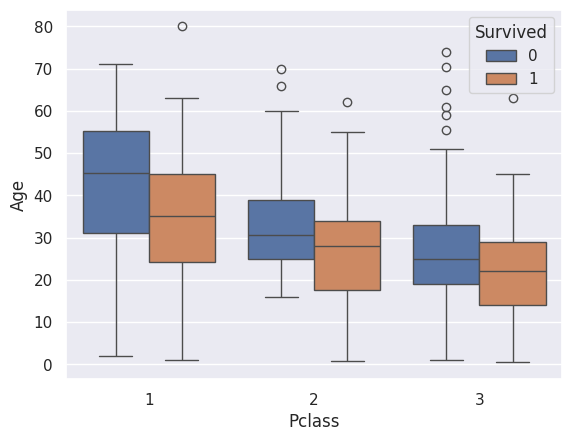

In [ ]:
sns.boxplot(data=data, x="Pclass", y="Age", hue="Survived")

In [ ]:
#Indexar el dataset por indice
data.loc[4]

Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                 35.0
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object

In [ ]:
data.loc[4,'Name']

'Futrelle, Mrs. Jacques Heath (Lily May Peel)'

In [ ]:
#Indexar el dataset por posición del registro (arrancan en 0)
data.iloc[4]

Survived                           0
Pclass                             3
Name        Allen, Mr. William Henry
Sex                             male
Age                             35.0
SibSp                              0
Parch                              0
Ticket                        373450
Fare                            8.05
Cabin                            NaN
Embarked                           S
Name: 5, dtype: object

In [ ]:
data.iloc[4,2]
data.iloc[:4,2]

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
Name: Name, dtype: object

In [ ]:
data.isnull().sum().sort_values(ascending=False)/ len(data)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
dtype: float64

In [ ]:
data = data.drop(columns = ["Cabin"]) #eliminar la columna Cabin

In [ ]:
#Dado que el 20% de Age está null, necesito deducir las edades a partir del title.
data['titulo']=data['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
data['titulo'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: titulo, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
 10  titulo    891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [ ]:
data[data.Age.isnull()].groupby("titulo").size() #agrupo por título los datos null y cuento la cantidad de cada categoría

titulo
Dr          1
Master      4
Miss       36
Mr        119
Mrs        17
dtype: int64

In [ ]:
#Se completarán los valores de la edad en base a la media de la edad por el titulo (Menos para Mr que lo revisaremos más en detalle).
#tituloEdad tendrá la columna titulo+edad, que es la media de cada título.
tituloEdad = data[data.Age.isnull() == False].groupby("titulo").agg({"Age": "mean"}).reset_index()

In [ ]:
tituloEdad

,titulo,Age
0,Capt,70.000000
1,Col,58.000000
2,Don,40.000000
3,Dr,42.000000
4,Jonkheer,38.000000
5,Lady,48.000000
6,Major,48.500000
7,Master,4.574167
8,Miss,21.773973
9,Mlle,24.000000


In [ ]:
#hacer un leftjoin entre data y tituloEdad sobre la columna título.
data = pd.merge(data, tituloEdad, how="left", on="titulo")
#reemplazo el nombre de la columna Age_x por Age.
data = data.rename (columns = {"Age_x" : "Age"}) #El "_x" se usa para distinguir la columna de la base de la izq.

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titulo,Age_y
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,32.368090
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,35.898148
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,21.773973
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,35.898148
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,32.368090
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev,43.166667
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,21.773973
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss,21.773973
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,32.368090


In [ ]:
#para las filas donde la edad es null y el título no es Mr, que tomen la media calculada anteriormente (Age_y) como Age,
#de lo contrario, que tome el dato como viene.
data["Age"] = np.where((data.Age.isnull()) & (data.titulo != "Mr"), data.Age_y, data.Age)
data = data.drop(columns = ["Age_y"])

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titulo
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


Para los Mr, calcularemos la edad como la mediana de edad por Clase y Puerto de embarque

In [ ]:
medianAge = data[data.Age.isnull() == False].groupby(["Pclass", "Embarked"]).agg( {"Age": "median"}).reset_index().rename(columns = {"Age": "medianAge"})
data = pd.merge(data, medianAge, how="left", on = ["Pclass", "Embarked"])
data["Age"] = np.where(data.Age.isnull(), data.medianAge, data.Age)
data = data.drop(columns = ["medianAge"])

In [ ]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titulo
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
5,0,3,"Moran, Mr. James",male,21.773973,0,0,330877,8.4583,Q,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs


In [ ]:
#Reemplazo los nulls en Embarked por la moda de esta columna
data["Embarked"] = np.where(data.Embarked.isnull(), data.Embarked.mode().values[0], data.Embarked)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
titulo         0
dtype: int64

En base a la edad crearemos una variable que será el Ratio entre la edad y la mediana de edad abierta por título

In [ ]:
medianAge = data.groupby("titulo").agg( {"Age": "median"}).reset_index().rename(columns = {"Age": "medianAge"})
data = pd.merge(data, medianAge, how="left", on = "titulo")
data["ageRatioTitle"] = data.Age / data.medianAge
data.drop(columns=["medianAge"], inplace = True)

In [ ]:
data.groupby("SibSp").size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

Comenzamos a trabajar sobre la imputación de variables categóricas. Comenzaremos con la variable titulo. Para esta variable trabajaremos con el método WoE (Weigth of Evidence)

**WoE**

El concepto de weight of evidence surge con la generación de modelos de scoring de crédito para poder entender el poder predictivo de las variables independientes en relación con la variable dependiente. Como fue introducida en el mundo del riesgo, generalmente podemos encontrar la métrica como la separación de los buenos y los malos clientes. Los malos clientes se refieren a aquellos que llegaron a tener un default crediticio. No obstante lo podemos generalizar a la relación existente entre un evento y un no evento.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>W</mi>
  <mi>O</mi>
  <mi>E</mi>
  <mo>=</mo>
  <mi>ln</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mfrac>
    <mrow>
      <mi mathvariant="normal">%</mi>
      <mi>n</mi>
      <mi>o</mi>
      <mi>n</mi>
      <mi>E</mi>
      <mi>v</mi>
      <mi>e</mi>
      <mi>n</mi>
      <mi>t</mi>
      <mi>s</mi>
    </mrow>
    <mrow>
      <mi mathvariant="normal">%</mi>
      <mi>e</mi>
      <mi>v</mi>
      <mi>e</mi>
      <mi>n</mi>
      <mi>t</mi>
      <mi>s</mi>
    </mrow>
  </mfrac>
  <mo stretchy="false">)</mo>
</math>

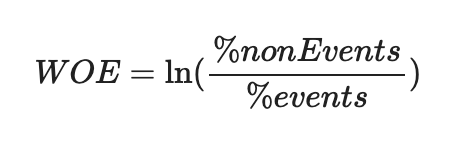

Instalamos la librería category_encoders usando !pip install category_encoders

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
from category_encoders import *

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titulo,ageRatioTitle
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,0.785714
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,1.058550
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,1.194086
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,0.974981
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev,0.580645
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss,0.872601
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss,1.000000
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr,0.928571


In [ ]:
#transformar la columna SibSp con la variable target Survived y reemplazo la columna SibSp por el cálculo woe_sibSp
WOE_encoder = WOEEncoder()
sibSp = WOE_encoder.fit_transform(data["SibSp"].astype(str), data.Survived)
data = data.join(sibSp.rename(columns = {"SibSp":"woe_sibSp"}))

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titulo,ageRatioTitle,woe_sibSp
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,0.785714,0.613513
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,1.058550,0.613513
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,1.194086,-0.166010
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,0.974981,0.613513
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,1.250000,-0.166010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev,0.580645,-0.166010
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss,0.872601,-0.166010
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss,1.000000,0.613513
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr,0.928571,-0.166010


In [ ]:
#creamos la variable withfamily considerando SibSp y Parch.
data["withFamily"] = np.where((data.SibSp+data.Parch) >= 0, 1, 0)

In [ ]:
#eliminamos la columna SibSp
data.drop(columns=["SibSp"], inplace=True)

In [ ]:
#hacer el mismo proceso con Parch
WOE_encoder = WOEEncoder()
parch = WOE_encoder.fit_transform(data["Parch"].astype(str), data.Survived)
data = data.join(parch.rename(columns = {"Parch":"woe_parch"}))
data.drop(columns=["Parch"], inplace=True)

In [ ]:
#lo mismo con la variable Título
WOE_encoder = WOEEncoder()
titulo = WOE_encoder.fit_transform(data["titulo"].astype(str), data.Survived)
data = data.join(titulo.rename(columns = {"titulo":"woe_title"}))
data.drop(columns=["titulo"], inplace=True)

In [ ]:
medianAge = data.groupby("Pclass").agg( {"Age": "median"}).reset_index().rename(columns = {"Age": "medianAge"})
data = pd.merge(data, medianAge, how="left", on = "Pclass")
data["ageRatioClass"] = data.Age / data.medianAge
data.drop(columns=["medianAge"], inplace = True)

In [ ]:
data = pd.merge(data,
         data.groupby("Pclass").agg({"Fare": "median"}).reset_index().rename(columns={"Fare": "medianFare"}),
         how = "inner", on="Pclass")
data["fareRatioClass"] = data.Fare / data.Age
data.drop(columns=["medianFare"], inplace=True)

In [ ]:
data.join(pd.get_dummies(data[["Sex"]]))
data.drop(columns=["Sex"], inplace=True)

In [ ]:
data.join(pd.get_dummies(data[["Embarked"]]))
data.drop(columns=["Embarked"], inplace=True)

In [ ]:
data.join(pd.get_dummies(data[["Pclass"]].astype(str)))
data.drop(columns=["Pclass"], inplace=True)

In [ ]:
#Para realizar todo tipo de agregaciones, se utiliza el método groupby.
#La funcion size() te hace una cuenta
#La funcion sum() suma los valores del algun campo, df.groupby("agrupador").campo.sum()
#La misma lógica se aplica en max() y min()
#sarasa = data.groupby("Sex")
#sarasa.size()
data

,PassengerId,Survived,Name,Age,Ticket,Fare,ageRatioTitle,woe_sibSp,withFamily,woe_parch,woe_title,ageRatioClass,fareRatioClass
0,1,0,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500,0.785714,0.613513,1,-0.173905,-1.202121,0.916667,0.329545
1,3,1,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250,1.194086,-0.166010,1,-0.173905,1.297772,1.083333,0.304808
2,5,0,"Allen, Mr. William Henry",35.000000,373450,8.0500,1.250000,-0.166010,1,-0.173905,-1.202121,1.458333,0.230000
3,6,0,"Moran, Mr. James",21.773973,330877,8.4583,0.777642,-0.166010,1,-0.173905,-1.202121,0.907249,0.388459
4,8,0,"Palsson, Master. Gosta Leonard",2.000000,349909,21.0750,0.500000,-0.484418,1,0.671764,0.758775,0.083333,10.537500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,867,1,"Duran y More, Miss. Asuncion",27.000000,SC/PARIS 2149,13.8583,1.240013,0.613513,1,-0.173905,1.297772,0.915254,0.513270
887,875,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.000000,P/PP 3381,24.0000,0.779985,0.613513,1,-0.173905,1.780426,0.949153,0.857143
888,881,1,"Shelley, Mrs. William (Imanita Parrish Hall)",25.000000,230433,26.0000,0.696415,-0.166010,1,0.671764,1.780426,0.847458,1.040000
889,884,0,"Banfield, Mr. Frederick James",28.000000,C.A./SOTON 34068,10.5000,1.000000,-0.166010,1,-0.173905,-1.202121,0.949153,0.375000


In [ ]:
data.drop(columns=["Name", "Ticket"], inplace=True)
data.reset_index().to_csv("{}/titanicPreprocesada.txt".format(contentFolder), sep=";", index= False)

In [ ]:
data = pd.read_csv("{}/titanicPreprocesada.txt".format(contentFolder), sep=";")